In [26]:
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import seaborn as sns
import os
from pathlib import Path
import pandas as pd
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [3]:
df = pd.read_csv('path')

In [7]:
Y = df.Credit_Score

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

In [12]:
#DROP MULTICLASS COLUMN AND APPLY STANDAR SCALER
X=df.drop('Credit_Score', axis = 1)
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[-1.73203349, -1.24722819, -0.11003104, ..., -0.27565584,
         1.3430235 , -1.04765423],
       [-1.73199885, -1.24722819, -0.11003104, ..., -0.27565584,
         1.3430235 , -1.04765423],
       [-1.73196421, -0.17807954, -0.11003104, ..., -0.27565584,
         1.3430235 , -1.04765423],
       ...,
       [ 1.73196421, -1.03339846, -0.09568108, ..., -0.27565584,
         1.3430235 , -1.04765423],
       [ 1.73199885, -1.03339846, -0.09568108, ..., -0.27565584,
         1.3430235 , -1.04765423],
       [ 1.73203349, -1.03339846, -0.09568108, ..., -0.27565584,
         1.3430235 , -1.04765423]])

In [13]:
#SPLIT THE DATA INTO DATA AND TRAINING SET
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
#Logistic regression and gridsearch for tunning parameters

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
grid_search_CV = GridSearchCV(
    estimator = lr,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10
)

logreg_cv = grid_search_CV.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.5761375000000001


In [15]:
#Score
score_lg = logreg_cv.score(X_test, Y_test)
print('Score is ' + str(logreg_cv.score(X_test, Y_test)))

Score is 0.5768


In [17]:
#Display confussion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Good', 'Standar', 'Poor']); ax.yaxis.set_ticklabels(['Good', 'Standar', 'Poor'])

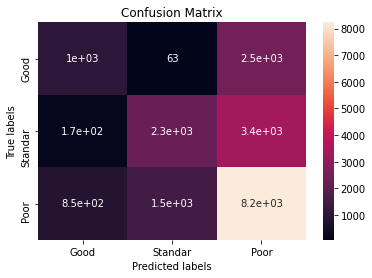

In [18]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
#Algorith seems to be good evaluating Poor case, but no good or standar cases

In [19]:
#DecisionTree Classifier
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
grid_search_CV_tree = GridSearchCV(
    estimator = tree,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10
)


tree_cv= grid_search_CV_tree.fit(X_train, Y_train)

In [20]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.6857375


In [21]:
score_tree = tree_cv.score(X_test, Y_test)
print('score ' + str(score_tree))

score 0.68765


In [23]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
grid_search_CV_KNN = GridSearchCV(
    estimator = KNN,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10
)

knn_cv = grid_search_CV_KNN.fit(X_train, Y_train)

In [24]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.7086749999999999


In [25]:
score_knn = knn_cv.score(X_test, Y_test)
print('Score: ' + str(score_knn))

Score: 0.7164


In [33]:
XGBoost = xgb.XGBClassifier()

xgboost_fit = XGBoost.fit(X_train, Y_train)
xgboost_fit

[12:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
Score_xgboost = xgboost_fit.score(X_test, Y_test)
print('Score: ' + str(Score_xgboost))

Score: 0.7428


XGBoost is The best model for this problem, with a Score of 74.3 %